# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core.Shape
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:54: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr.dtype, jax.dtypes.prng_key) for runtime detection of typed prng keys (i.e. keys created with jax.random.key).
For more information, see https://jax.readthedocs.io/en/latest/jep/9263-typed-keys.html
  PRNGKey = jax.random.KeyArray
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scib_metrics/_types.py:9: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.i

In [2]:
#genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
genes = torch.load('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu'))['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [34]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/REIyQZE6OMZm1S3W2Dxi.h5ad')
#adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
#adata = adata[:, adata.var.index.isin(genes)]
adata

AnnData object with n_obs × n_vars = 34132 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'feature_is_filtered'

In [37]:
adata.obs.tissue

06e4e8c5-1783-48b9-b531-03c03ec80f6b    ciliary body
b7adcc43-8567-4828-bda2-057832d523ee    ciliary body
83a5b2ca-2e4a-4e78-babd-856da32e46d2    ciliary body
66b20a2c-1db2-4dda-a72a-6abb9c343f27    ciliary body
0e84672b-7788-4219-88fc-2a95503cf253    ciliary body
                                            ...     
27d30bfd-6c5a-4994-be3f-32b963b6292a    ciliary body
ad4cad58-b7c8-4d9d-b095-a3c2b48112bd    ciliary body
43b6a20d-5291-4438-93d1-5bdcd9e72d3d    ciliary body
3eb2b75b-642a-43d7-88f0-4eb7aad811b3    ciliary body
a76f0281-acca-46fe-95e8-b8a5b47863a3    ciliary body
Name: tissue, Length: 34132, dtype: category
Categories (1, object): ['ciliary body']

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 54.65 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


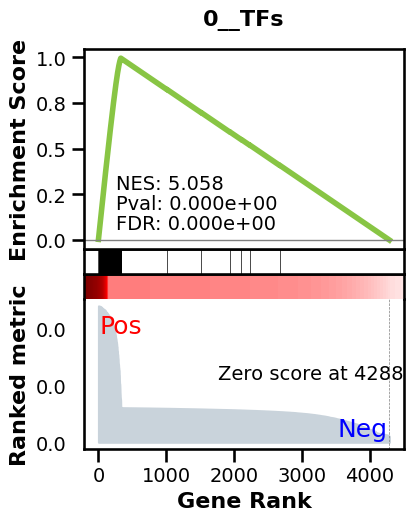

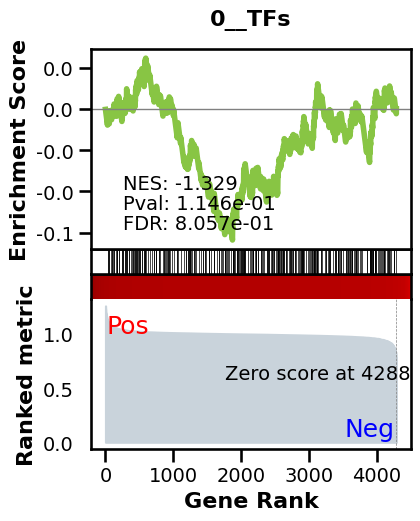

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2921 genes
intersection pct: 0.6810445325250641
precision:  0.008458778459255703 
recall:  0.5565176022835395 
random precision: 0.0012322201535409623


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 71.34it/s]

 12%|█▎        | 16/128 [00:00<00:01, 71.29it/s]

 19%|█▉        | 24/128 [00:00<00:01, 71.36it/s]

 25%|██▌       | 32/128 [00:00<00:01, 71.40it/s]

 31%|███▏      | 40/128 [00:00<00:01, 71.39it/s]

 38%|███▊      | 48/128 [00:00<00:01, 71.39it/s]

 44%|████▍     | 56/128 [00:00<00:01, 71.41it/s]

 50%|█████     | 64/128 [00:00<00:00, 71.40it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 71.41it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 71.40it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 71.43it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 71.44it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 71.43it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 71.42it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 69.45it/s]

100%|██████████| 128/128 [00:01<00:00, 70.97it/s]

Average Precision (AP):  0.010870907382485789
Area Under Precision-Recall Curve (AUPRC):  0.010025720493232191
EPR: 29.378975399877923


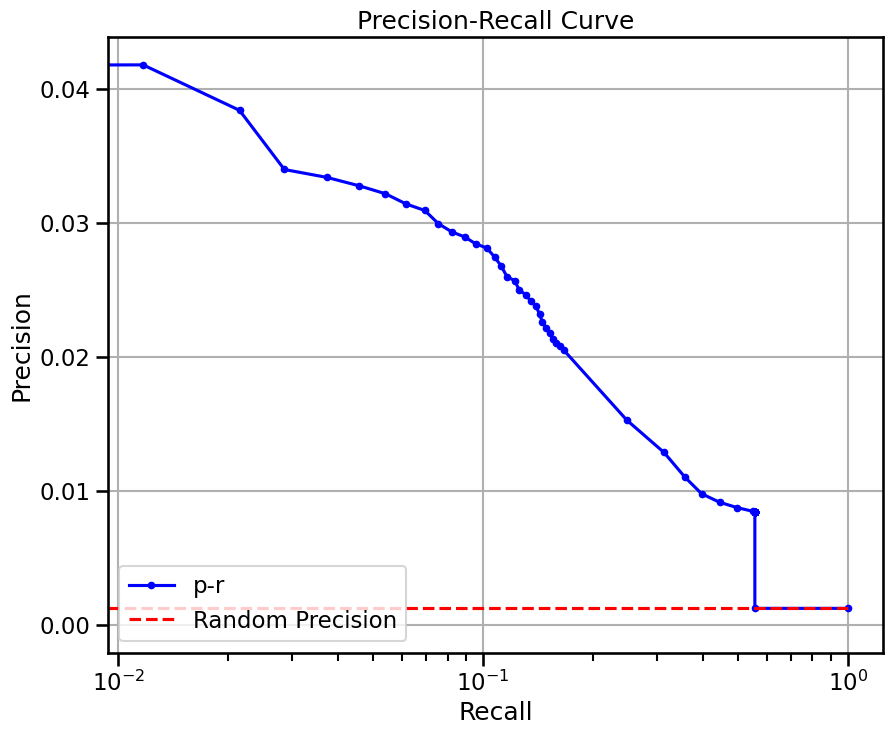

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 181.29 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


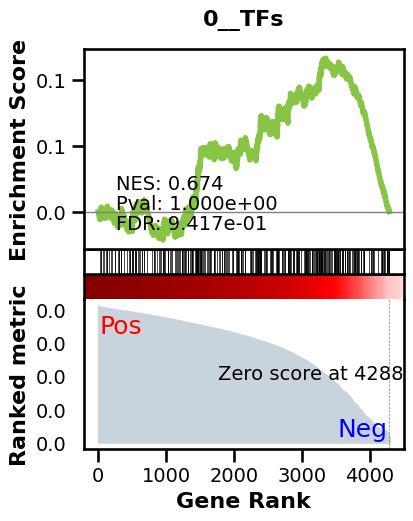

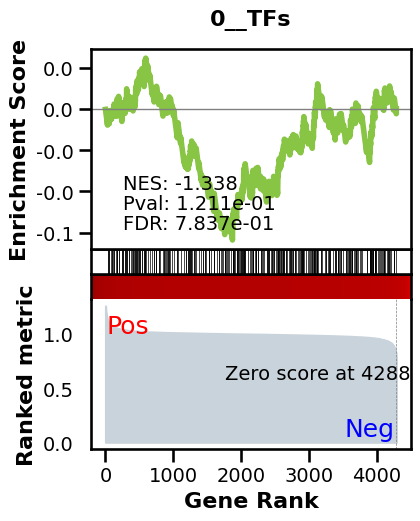

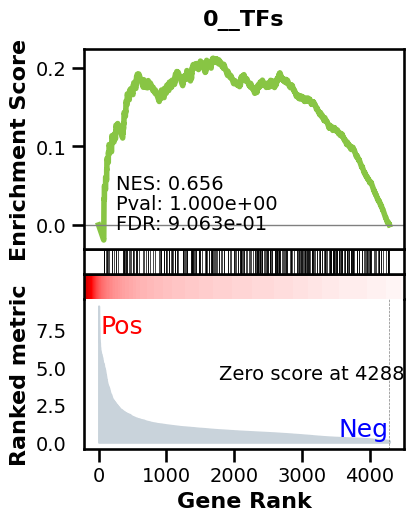

_________________________________________
TF specific enrichment


found some significant results for  29.166666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2921 genes
intersection pct: 0.6810445325250641
precision:  0.001528900855698379 
recall:  0.6284490960989534 
random precision: 0.0012322201535409623


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 71.63it/s]

 12%|█▎        | 16/128 [00:00<00:01, 71.74it/s]

 19%|█▉        | 24/128 [00:00<00:01, 69.71it/s]

 24%|██▍       | 31/128 [00:00<00:01, 69.08it/s]

 30%|██▉       | 38/128 [00:00<00:01, 68.67it/s]

 35%|███▌      | 45/128 [00:00<00:01, 68.44it/s]

 41%|████      | 52/128 [00:00<00:01, 68.31it/s]

 46%|████▌     | 59/128 [00:00<00:01, 68.22it/s]

 52%|█████▏    | 66/128 [00:00<00:00, 68.16it/s]

 57%|█████▋    | 73/128 [00:01<00:00, 68.12it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 68.10it/s]

 68%|██████▊   | 87/128 [00:01<00:00, 68.08it/s]

 73%|███████▎  | 94/128 [00:01<00:00, 68.07it/s]

 79%|███████▉  | 101/128 [00:01<00:00, 68.07it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 67.93it/s]

 90%|████████▉ | 115/128 [00:01<00:00, 67.93it/s]

 95%|█████████▌| 122/128 [00:01<00:00, 67.98it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 68.38it/s]

Average Precision (AP):  0.0017468739485511891
Area Under Precision-Recall Curve (AUPRC):  0.0016736891836319039
EPR: 4.281147757886559


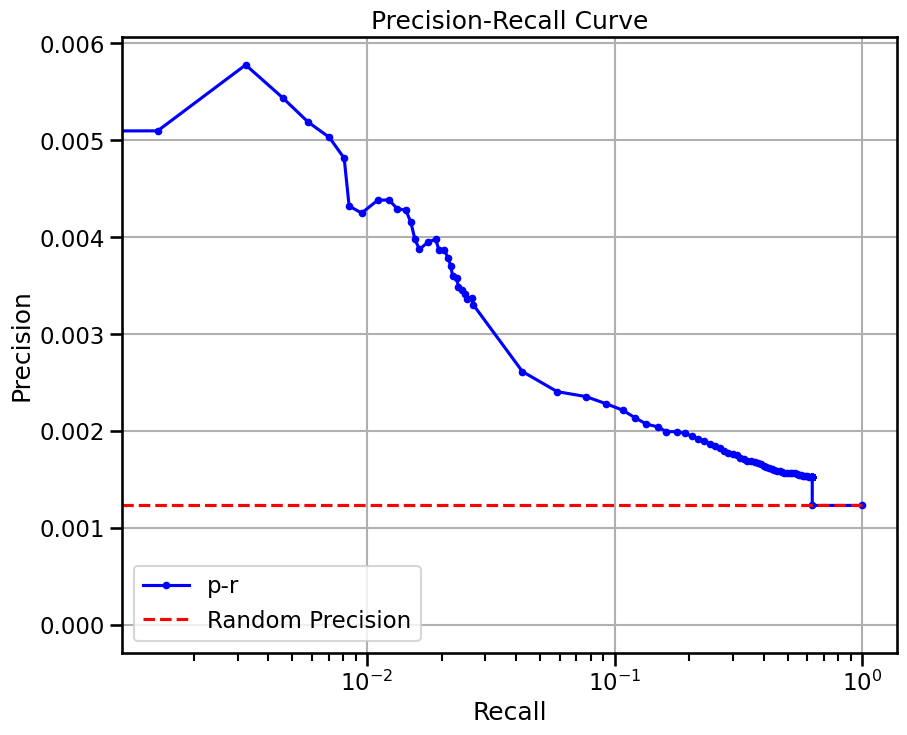

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 80.10 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


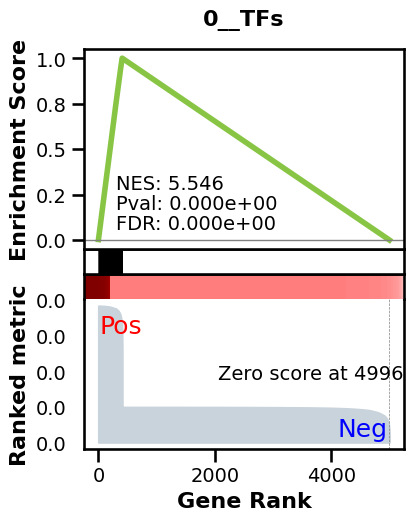

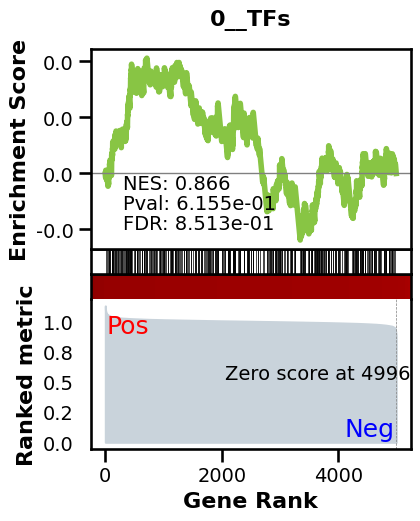

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3648 genes
intersection pct: 0.7300380228136882
precision:  0.0072597265448726 
recall:  0.4117233191152544 
random precision: 0.0017093026472130423


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 42.25it/s]

  8%|▊         | 10/128 [00:00<00:02, 42.24it/s]

 12%|█▏        | 15/128 [00:00<00:02, 42.26it/s]

 16%|█▌        | 20/128 [00:00<00:02, 42.26it/s]

 20%|█▉        | 25/128 [00:00<00:02, 42.24it/s]

 23%|██▎       | 30/128 [00:00<00:02, 42.22it/s]

 27%|██▋       | 35/128 [00:00<00:02, 42.21it/s]

 31%|███▏      | 40/128 [00:00<00:02, 42.23it/s]

 35%|███▌      | 45/128 [00:01<00:01, 42.21it/s]

 39%|███▉      | 50/128 [00:01<00:01, 42.20it/s]

 43%|████▎     | 55/128 [00:01<00:01, 42.21it/s]

 47%|████▋     | 60/128 [00:01<00:01, 42.18it/s]

 51%|█████     | 65/128 [00:01<00:01, 42.12it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 42.15it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 42.17it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 42.17it/s]

 66%|██████▋   | 85/128 [00:02<00:01, 42.15it/s]

 70%|███████   | 90/128 [00:02<00:00, 42.18it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 42.17it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 42.14it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 42.14it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 42.16it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 42.17it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 42.14it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 42.12it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 42.16it/s]

Average Precision (AP):  0.00612611173911736
Area Under Precision-Recall Curve (AUPRC):  0.005504826313212794
EPR: 11.426091812232043


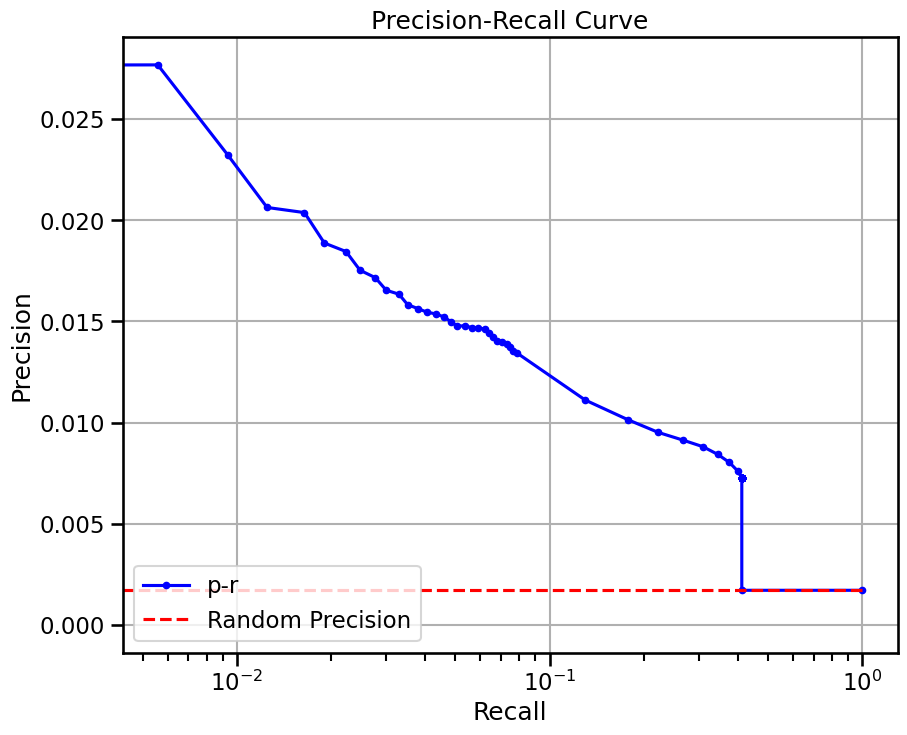

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 277.89 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


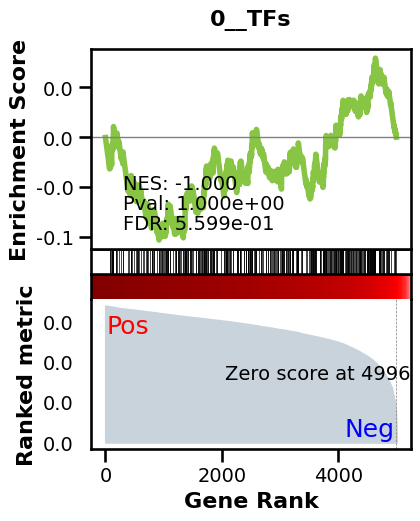

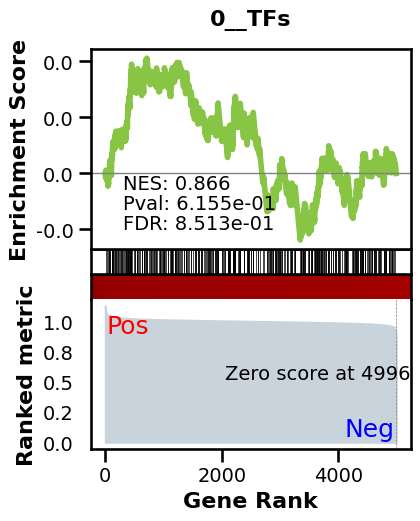

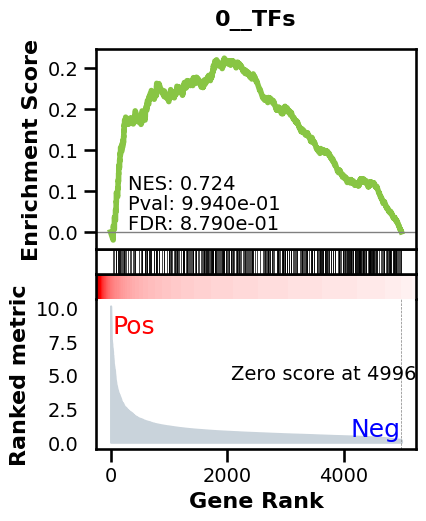

_________________________________________
TF specific enrichment


found some significant results for  14.0625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3648 genes
intersection pct: 0.7300380228136882
precision:  0.0019061091204722019 
recall:  0.7303548656611407 
random precision: 0.0017093026472130423


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 42.60it/s]

  8%|▊         | 10/128 [00:00<00:02, 42.53it/s]

 12%|█▏        | 15/128 [00:00<00:02, 42.52it/s]

 16%|█▌        | 20/128 [00:00<00:02, 42.50it/s]

 20%|█▉        | 25/128 [00:00<00:02, 42.48it/s]

 23%|██▎       | 30/128 [00:00<00:02, 42.49it/s]

 27%|██▋       | 35/128 [00:00<00:02, 42.49it/s]

 31%|███▏      | 40/128 [00:00<00:02, 42.45it/s]

 35%|███▌      | 45/128 [00:01<00:01, 42.44it/s]

 39%|███▉      | 50/128 [00:01<00:01, 42.42it/s]

 43%|████▎     | 55/128 [00:01<00:01, 42.43it/s]

 47%|████▋     | 60/128 [00:01<00:01, 42.42it/s]

 51%|█████     | 65/128 [00:01<00:01, 42.44it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 42.44it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 42.44it/s]

 62%|██████▎   | 80/128 [00:01<00:01, 42.42it/s]

 66%|██████▋   | 85/128 [00:02<00:01, 42.43it/s]

 70%|███████   | 90/128 [00:02<00:00, 42.43it/s]

 74%|███████▍  | 95/128 [00:02<00:00, 42.44it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 42.43it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 42.44it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 42.44it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 42.43it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 42.19it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 42.26it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 42.40it/s]

Average Precision (AP):  0.0019402579535117478
Area Under Precision-Recall Curve (AUPRC):  0.0019017552730051352


EPR: 2.50825673510101


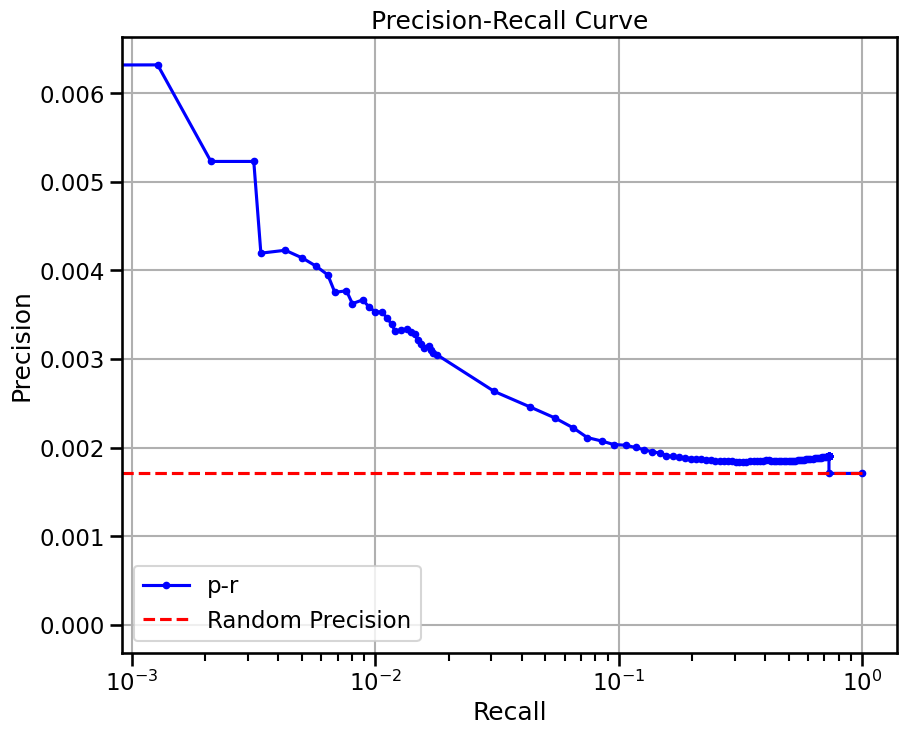

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 59.89 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


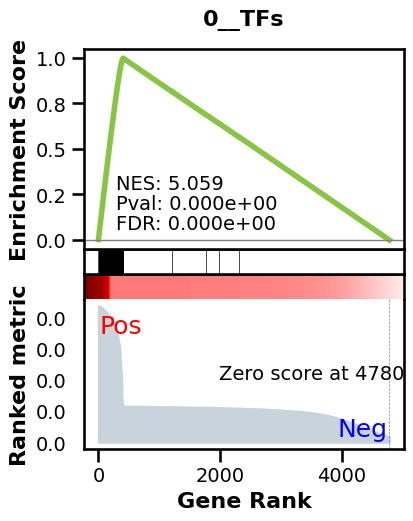

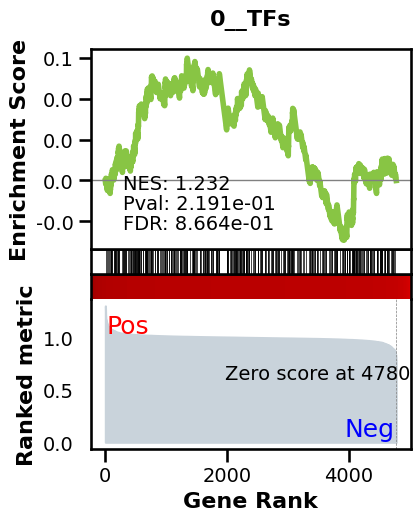

_________________________________________
TF specific enrichment


found some significant results for  9.090909090909092 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3225 genes
intersection pct: 0.6745450742522485
precision:  0.001567239467294304 
recall:  0.2255843739993596 
random precision: 0.0006007271048531364


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.96it/s]

 11%|█         | 14/128 [00:00<00:01, 61.05it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.07it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.11it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.10it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.14it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.17it/s]

 44%|████▍     | 56/128 [00:00<00:01, 61.16it/s]

 49%|████▉     | 63/128 [00:01<00:01, 61.14it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 61.12it/s]

 60%|██████    | 77/128 [00:01<00:00, 61.13it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 61.14it/s]

 71%|███████   | 91/128 [00:01<00:00, 61.15it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 61.15it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 61.13it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 61.14it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 61.13it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 61.14it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 61.10it/s]

Average Precision (AP):  0.001039134154861365
Area Under Precision-Recall Curve (AUPRC):  0.0009098065931985456
EPR: 5.627870750471766


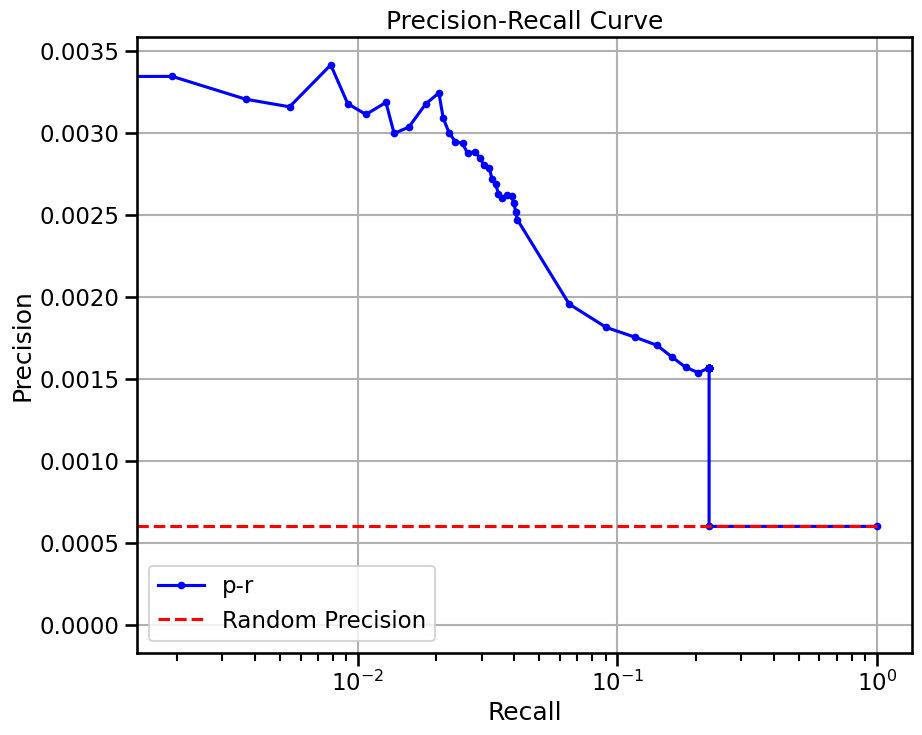

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 189.08 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


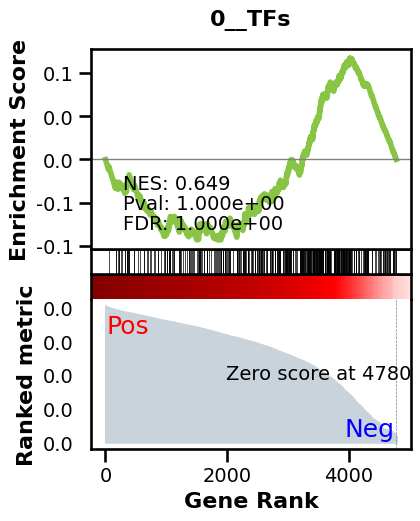

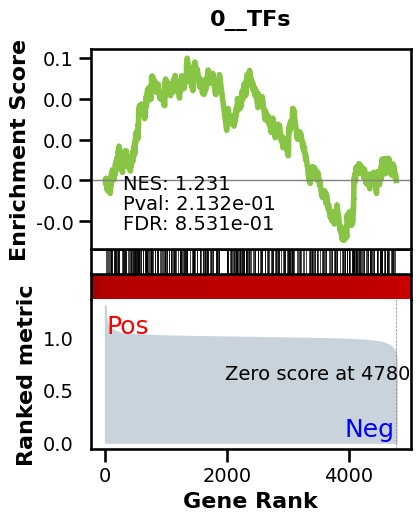

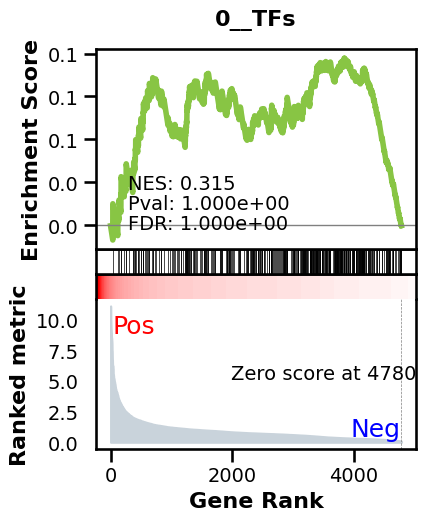

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3225 genes
intersection pct: 0.6745450742522485
precision:  0.0007067939531786336 
recall:  0.5456292026897214 
random precision: 0.0006007271048531364


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 61.04it/s]

 11%|█         | 14/128 [00:00<00:01, 61.02it/s]

 16%|█▋        | 21/128 [00:00<00:01, 61.04it/s]

 22%|██▏       | 28/128 [00:00<00:01, 61.04it/s]

 27%|██▋       | 35/128 [00:00<00:01, 61.05it/s]

 33%|███▎      | 42/128 [00:00<00:01, 61.04it/s]

 38%|███▊      | 49/128 [00:00<00:01, 61.01it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.68it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.76it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.88it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.95it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.97it/s]

 71%|███████   | 91/128 [00:01<00:00, 61.01it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 61.00it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 61.01it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 61.03it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 61.03it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 61.02it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.95it/s]

Average Precision (AP):  0.0006915817069155166
Area Under Precision-Recall Curve (AUPRC):  0.0006798839131351104
EPR: 1.333105443349399


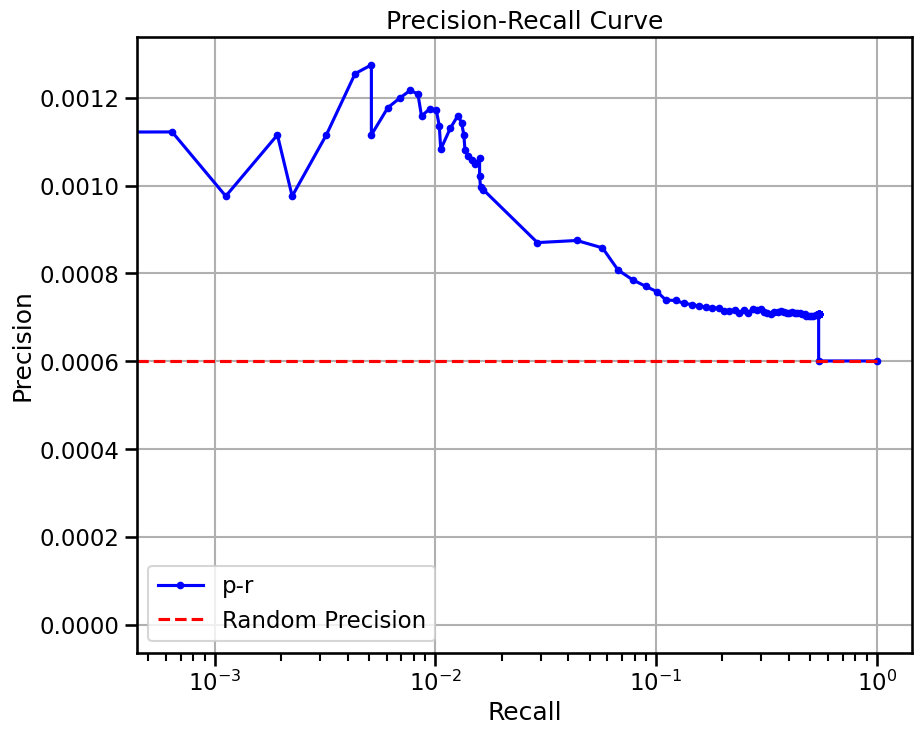

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 31.20 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


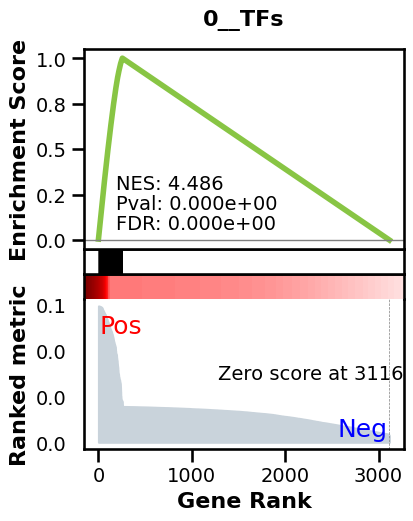

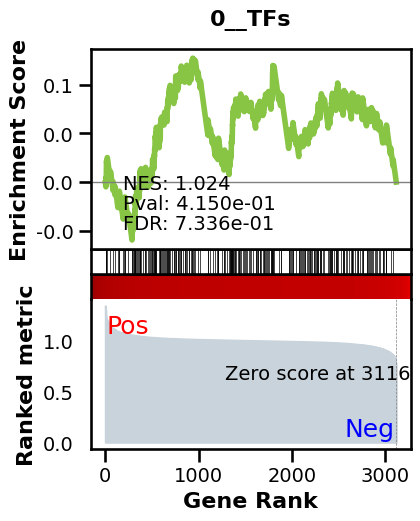

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2091 genes
intersection pct: 0.670837343599615
precision:  0.0037224451811783865 
recall:  0.3151075408136823 
random precision: 0.0008830279690356712


  0%|          | 0/128 [00:00<?, ?it/s]

 12%|█▏        | 15/128 [00:00<00:00, 142.05it/s]

 23%|██▎       | 30/128 [00:00<00:00, 141.79it/s]

 35%|███▌      | 45/128 [00:00<00:00, 141.70it/s]

 47%|████▋     | 60/128 [00:00<00:00, 141.60it/s]

 59%|█████▊    | 75/128 [00:00<00:00, 141.56it/s]

 70%|███████   | 90/128 [00:00<00:00, 141.55it/s]

 82%|████████▏ | 105/128 [00:00<00:00, 140.63it/s]

 94%|█████████▍| 120/128 [00:00<00:00, 140.94it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 141.14it/s]

Average Precision (AP):  0.0024799305628765726
Area Under Precision-Recall Curve (AUPRC):  0.002187841002487215
EPR: 7.720242645448791


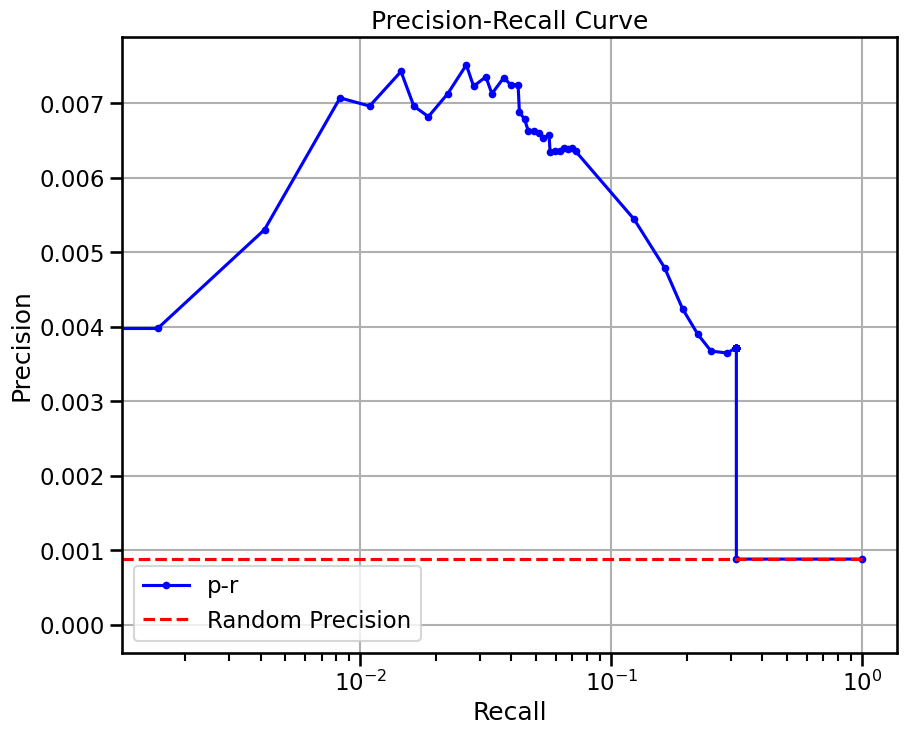

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 71.17 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


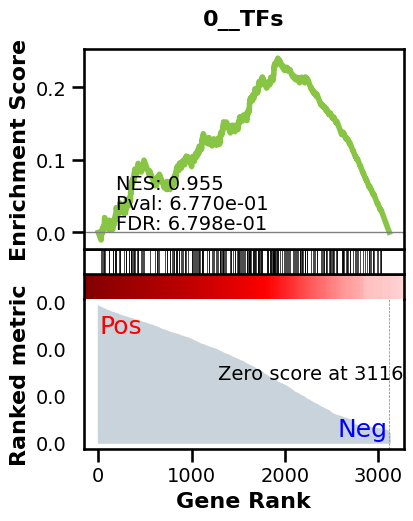

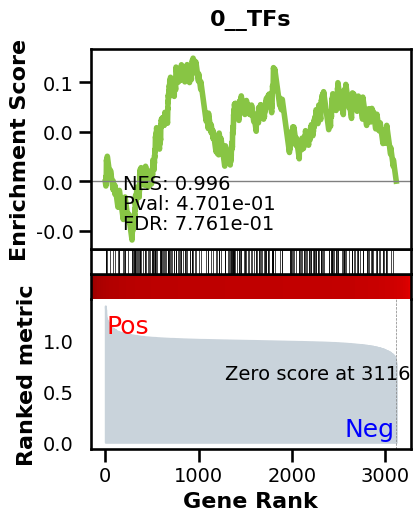

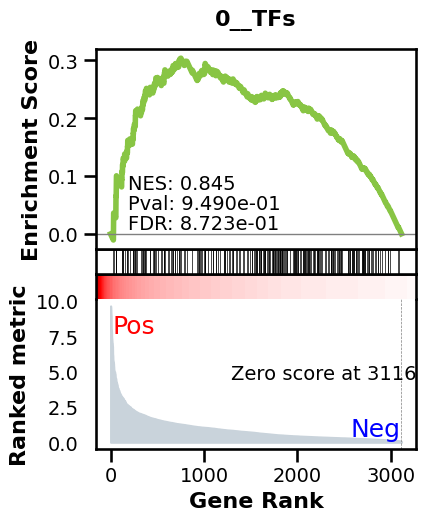

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2091 genes
intersection pct: 0.670837343599615
precision:  0.0010836660071452042 
recall:  0.4418243068152371 
random precision: 0.0008830279690356712


  0%|          | 0/128 [00:00<?, ?it/s]

 12%|█▏        | 15/128 [00:00<00:00, 140.58it/s]

 23%|██▎       | 30/128 [00:00<00:00, 140.35it/s]

 35%|███▌      | 45/128 [00:00<00:00, 140.35it/s]

 47%|████▋     | 60/128 [00:00<00:00, 140.43it/s]

 59%|█████▊    | 75/128 [00:00<00:00, 140.47it/s]

 70%|███████   | 90/128 [00:00<00:00, 140.50it/s]

 82%|████████▏ | 105/128 [00:00<00:00, 140.64it/s]

 94%|█████████▍| 120/128 [00:00<00:00, 140.66it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:00<00:00, 140.45it/s]

Average Precision (AP):  0.0010388848355094714
Area Under Precision-Recall Curve (AUPRC):  0.0010245221166087478
EPR: 1.7631387166400516


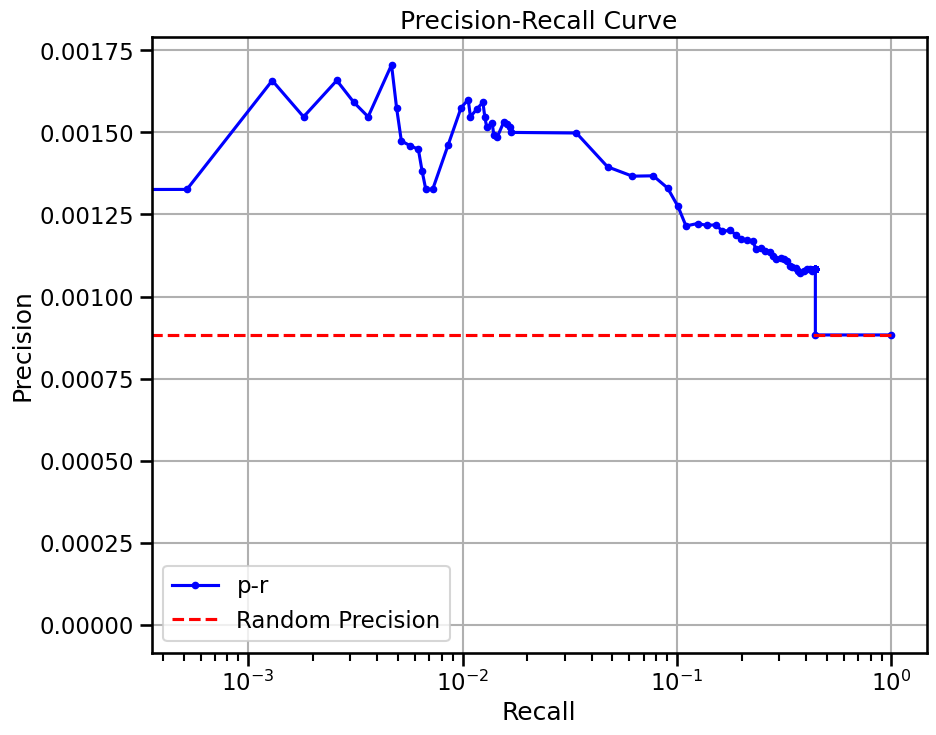

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 39.41 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


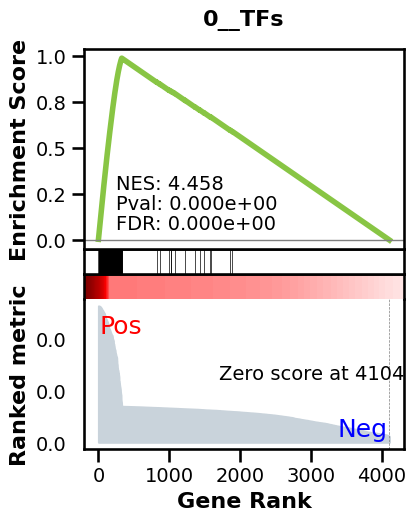

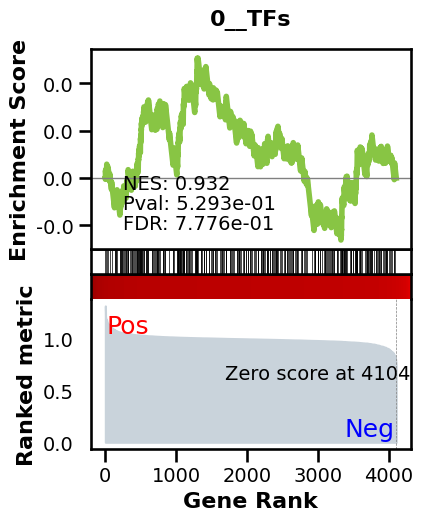

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2831 genes
intersection pct: 0.6896467722289891
precision:  0.005510638719213064 
recall:  0.366894402493108 
random precision: 0.0010413481233141906


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 76.70it/s]

 12%|█▎        | 16/128 [00:00<00:01, 76.84it/s]

 19%|█▉        | 24/128 [00:00<00:01, 76.84it/s]

 25%|██▌       | 32/128 [00:00<00:01, 76.87it/s]

 31%|███▏      | 40/128 [00:00<00:01, 75.68it/s]

 38%|███▊      | 48/128 [00:00<00:01, 76.06it/s]

 44%|████▍     | 56/128 [00:00<00:00, 76.33it/s]

 50%|█████     | 64/128 [00:00<00:00, 76.48it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 76.60it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 76.71it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 76.77it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 76.82it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 76.87it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 76.88it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 76.88it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 76.79it/s]

100%|██████████| 128/128 [00:01<00:00, 76.63it/s]

Average Precision (AP):  0.00415674068975006
Area Under Precision-Recall Curve (AUPRC):  0.003722685815962721
EPR: 13.581144790226244


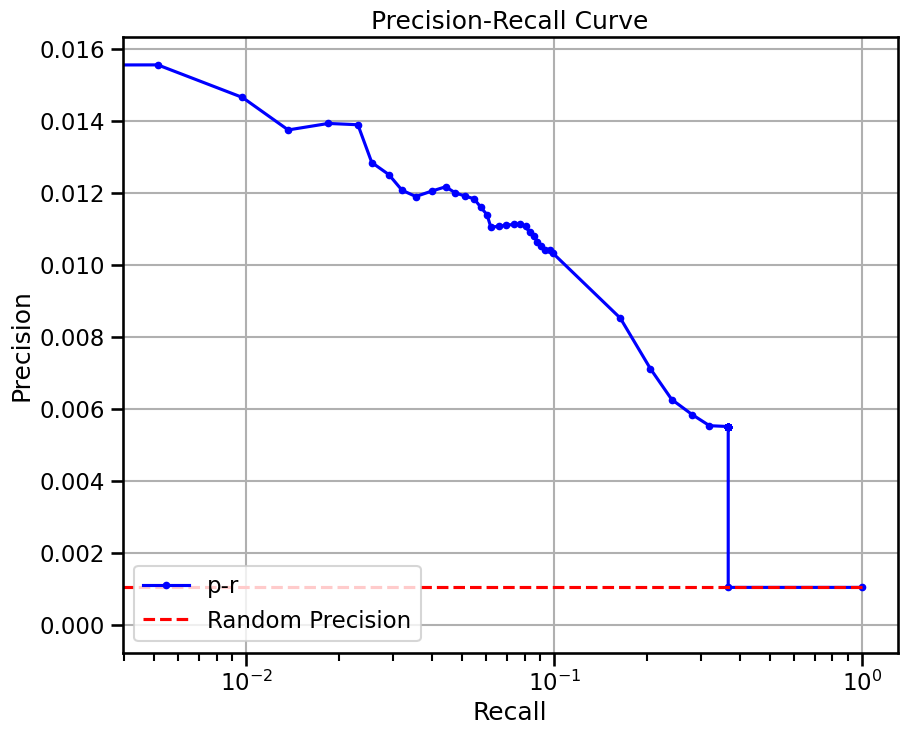

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 95.13 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


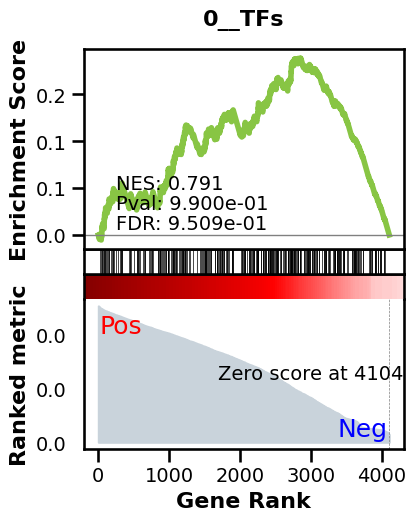

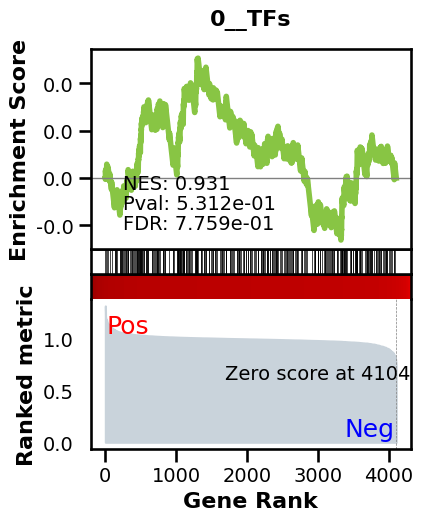

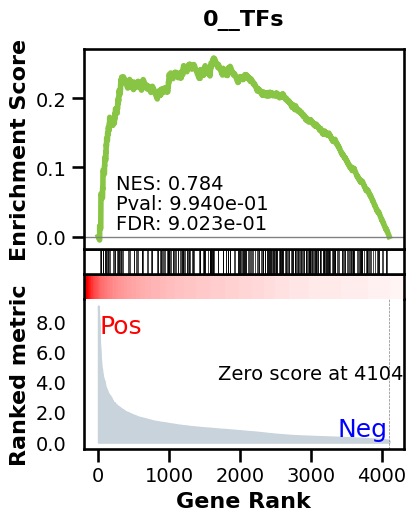

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2831 genes
intersection pct: 0.6896467722289891
precision:  0.0013373983482179643 
recall:  0.4552319309600863 
random precision: 0.0010413481233141906


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 77.82it/s]

 12%|█▎        | 16/128 [00:00<00:01, 77.95it/s]

 19%|█▉        | 24/128 [00:00<00:01, 78.00it/s]

 25%|██▌       | 32/128 [00:00<00:01, 78.01it/s]

 31%|███▏      | 40/128 [00:00<00:01, 78.05it/s]

 38%|███▊      | 48/128 [00:00<00:01, 78.01it/s]

 44%|████▍     | 56/128 [00:00<00:00, 78.03it/s]

 50%|█████     | 64/128 [00:00<00:00, 78.02it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 78.03it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 78.03it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 78.04it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 78.05it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 78.04it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 78.04it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 78.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:01<00:00, 77.96it/s]

100%|██████████| 128/128 [00:01<00:00, 77.98it/s]

Average Precision (AP):  0.00126083260195313
Area Under Precision-Recall Curve (AUPRC):  0.0012258359778617872
EPR: 1.0359931032731204


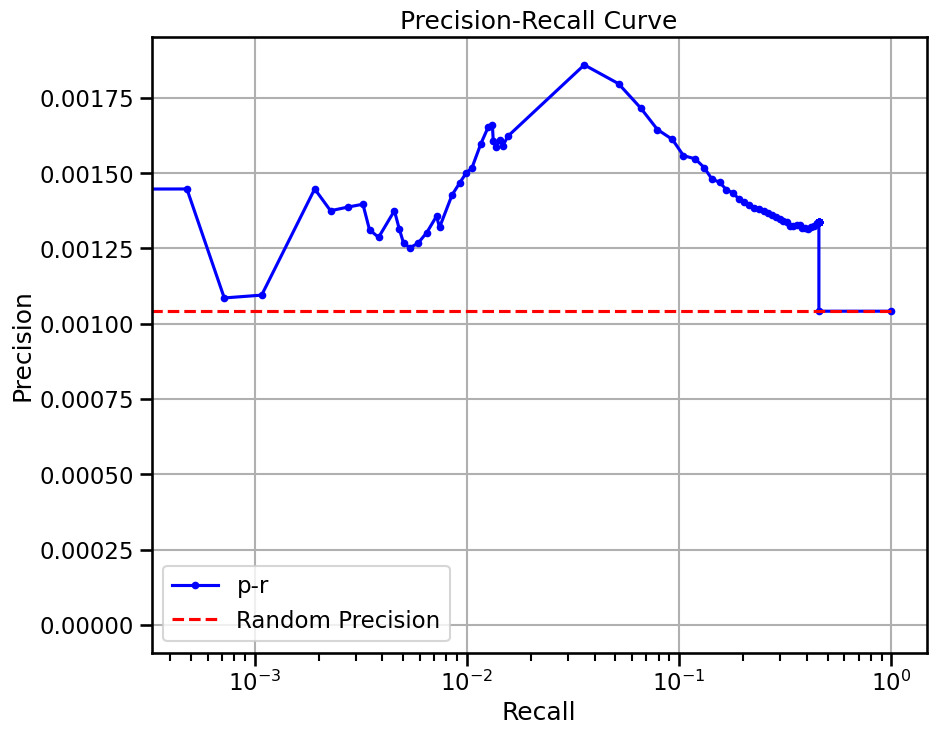

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 38.66 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


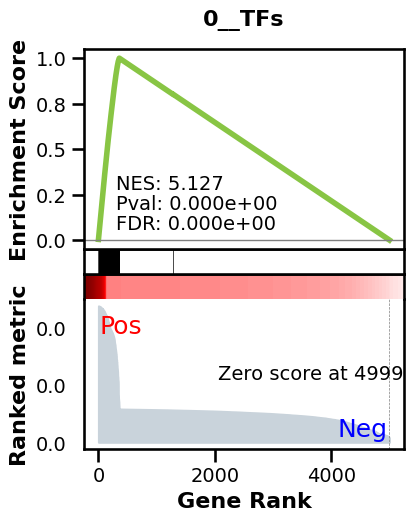

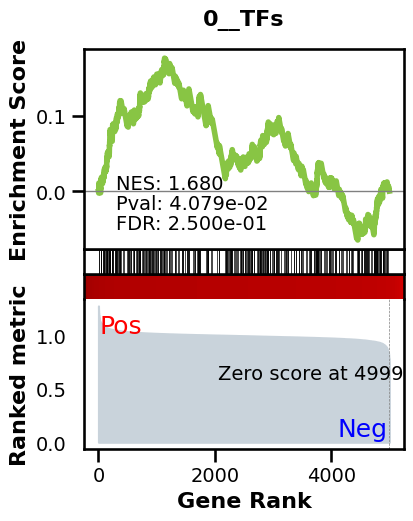

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3485 genes
intersection pct: 0.697
precision:  0.006611859577961273 
recall:  0.40224735605170386 
random precision: 0.0011214208177740587


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.93it/s]

  9%|▊         | 11/128 [00:00<00:02, 50.02it/s]

 13%|█▎        | 17/128 [00:00<00:02, 50.13it/s]

 18%|█▊        | 23/128 [00:00<00:02, 50.11it/s]

 23%|██▎       | 29/128 [00:00<00:01, 50.10it/s]

 27%|██▋       | 35/128 [00:00<00:01, 50.06it/s]

 32%|███▏      | 41/128 [00:00<00:01, 50.13it/s]

 37%|███▋      | 47/128 [00:00<00:01, 50.09it/s]

 41%|████▏     | 53/128 [00:01<00:01, 50.07it/s]

 46%|████▌     | 59/128 [00:01<00:01, 50.04it/s]

 51%|█████     | 65/128 [00:01<00:01, 50.05it/s]

 55%|█████▌    | 71/128 [00:01<00:01, 50.05it/s]

 60%|██████    | 77/128 [00:01<00:01, 50.06it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 50.08it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 50.01it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 50.03it/s]

 79%|███████▉  | 101/128 [00:02<00:00, 50.07it/s]

 84%|████████▎ | 107/128 [00:02<00:00, 50.04it/s]

 88%|████████▊ | 113/128 [00:02<00:00, 50.03it/s]

 93%|█████████▎| 119/128 [00:02<00:00, 50.05it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 50.04it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.04it/s]

Average Precision (AP):  0.004740718475621241
Area Under Precision-Recall Curve (AUPRC):  0.0043171705665885785
EPR: 12.079382916473195


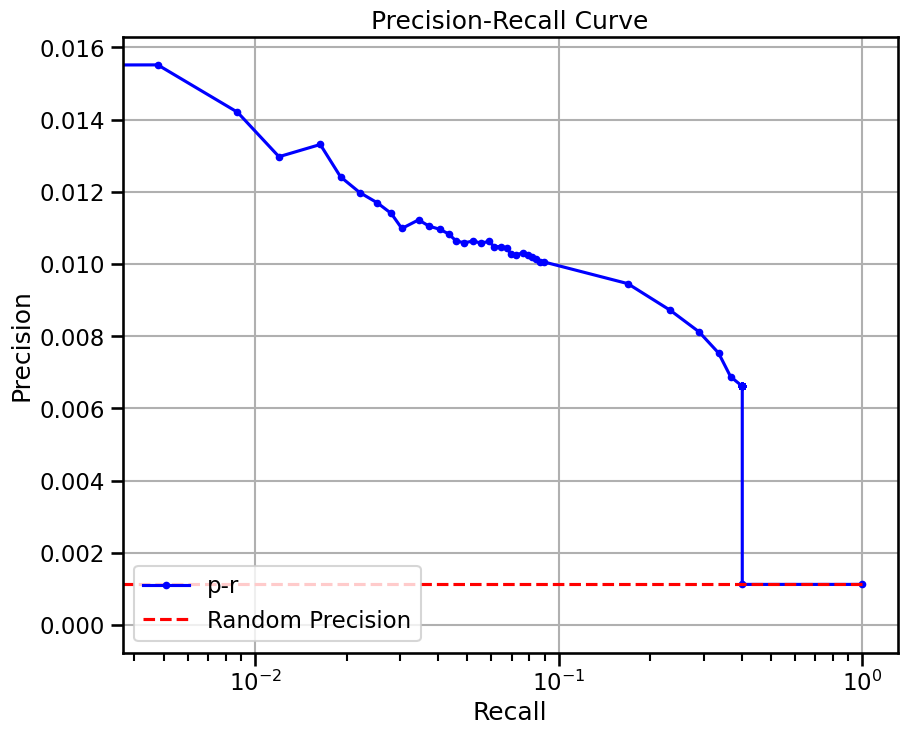

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 78.56 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


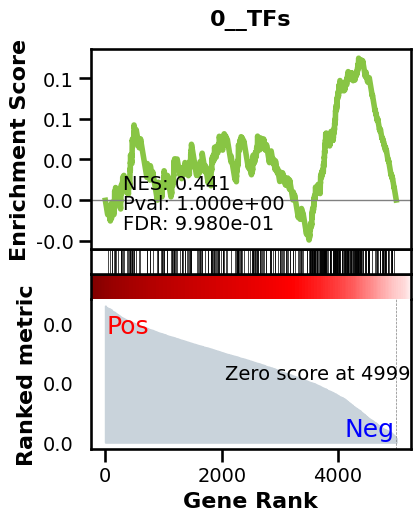

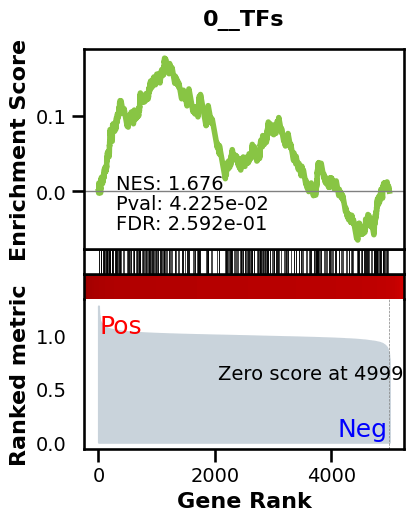

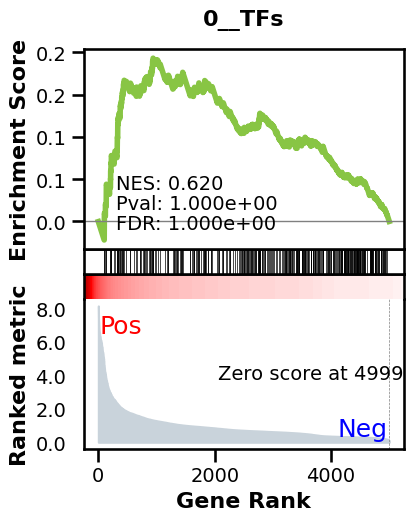

_________________________________________
TF specific enrichment


found some significant results for  5.882352941176471 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3485 genes
intersection pct: 0.697
precision:  0.0013430206848015819 
recall:  0.3974735605170388 
random precision: 0.0011214208177740587


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 48.83it/s]

  8%|▊         | 10/128 [00:00<00:02, 48.76it/s]

 12%|█▏        | 15/128 [00:00<00:02, 48.71it/s]

 16%|█▌        | 20/128 [00:00<00:02, 48.73it/s]

 20%|█▉        | 25/128 [00:00<00:02, 48.73it/s]

 23%|██▎       | 30/128 [00:00<00:02, 48.80it/s]

 27%|██▋       | 35/128 [00:00<00:01, 48.80it/s]

 31%|███▏      | 40/128 [00:00<00:01, 48.78it/s]

 35%|███▌      | 45/128 [00:00<00:01, 48.79it/s]

 39%|███▉      | 50/128 [00:01<00:01, 48.81it/s]

 43%|████▎     | 55/128 [00:01<00:01, 48.76it/s]

 47%|████▋     | 60/128 [00:01<00:01, 48.74it/s]

 51%|█████     | 65/128 [00:01<00:01, 48.70it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 48.66it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 48.68it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 48.65it/s]

 66%|██████▋   | 85/128 [00:01<00:00, 48.65it/s]

 70%|███████   | 90/128 [00:01<00:00, 48.63it/s]

 74%|███████▍  | 95/128 [00:01<00:00, 48.02it/s]

 78%|███████▊  | 100/128 [00:02<00:00, 48.20it/s]

 82%|████████▏ | 105/128 [00:02<00:00, 48.42it/s]

 86%|████████▌ | 110/128 [00:02<00:00, 48.56it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 48.58it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 48.60it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 48.58it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 48.62it/s]

Average Precision (AP):  0.0011950994582007309
Area Under Precision-Recall Curve (AUPRC):  0.0011677942464676293


EPR: 1.9689962578488447


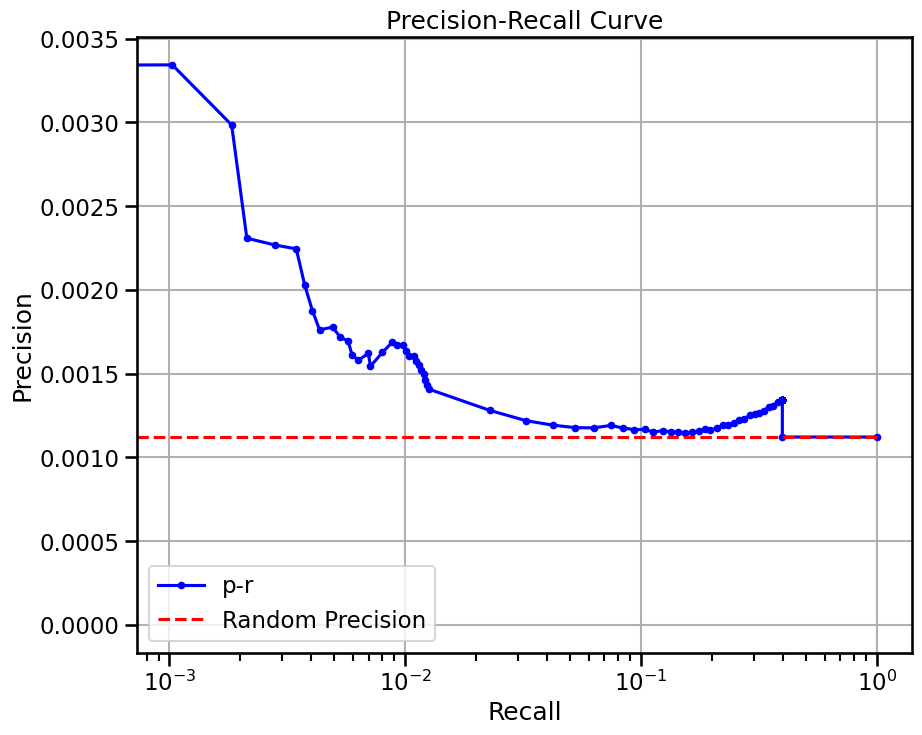

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 36.62 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


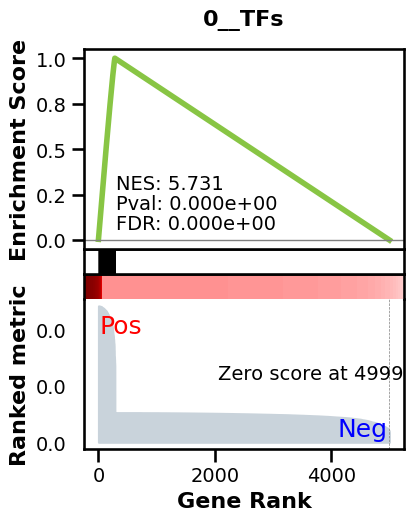

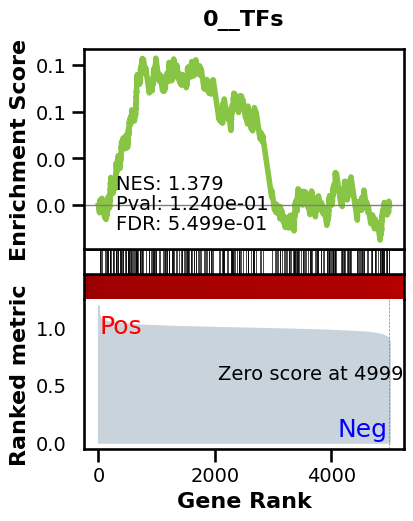

_________________________________________
TF specific enrichment


found some significant results for  5.882352941176471 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3467 genes
intersection pct: 0.6934
precision:  0.0063846035563055875 
recall:  0.3586412136168977 
random precision: 0.001146495246334619


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.84it/s]

  8%|▊         | 10/128 [00:00<00:02, 49.91it/s]

 12%|█▏        | 15/128 [00:00<00:02, 49.81it/s]

 16%|█▌        | 20/128 [00:00<00:02, 49.83it/s]

 20%|█▉        | 25/128 [00:00<00:02, 49.86it/s]

 23%|██▎       | 30/128 [00:00<00:01, 49.85it/s]

 27%|██▋       | 35/128 [00:00<00:01, 49.85it/s]

 31%|███▏      | 40/128 [00:00<00:01, 49.89it/s]

 35%|███▌      | 45/128 [00:00<00:01, 49.80it/s]

 39%|███▉      | 50/128 [00:01<00:01, 49.80it/s]

 43%|████▎     | 55/128 [00:01<00:01, 49.80it/s]

 47%|████▋     | 60/128 [00:01<00:01, 49.82it/s]

 51%|█████     | 65/128 [00:01<00:01, 49.85it/s]

 55%|█████▍    | 70/128 [00:01<00:01, 49.87it/s]

 59%|█████▊    | 75/128 [00:01<00:01, 49.76it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 49.70it/s]

 67%|██████▋   | 86/128 [00:01<00:00, 49.81it/s]

 71%|███████   | 91/128 [00:01<00:00, 49.72it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 49.79it/s]

 79%|███████▉  | 101/128 [00:02<00:00, 49.77it/s]

 83%|████████▎ | 106/128 [00:02<00:00, 49.78it/s]

 87%|████████▋ | 111/128 [00:02<00:00, 49.79it/s]

 91%|█████████ | 116/128 [00:02<00:00, 49.79it/s]

 95%|█████████▍| 121/128 [00:02<00:00, 49.80it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 49.79it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.79it/s]

Average Precision (AP):  0.005104313477618697
Area Under Precision-Recall Curve (AUPRC):  0.004576831263453476
EPR: 16.38066422100778


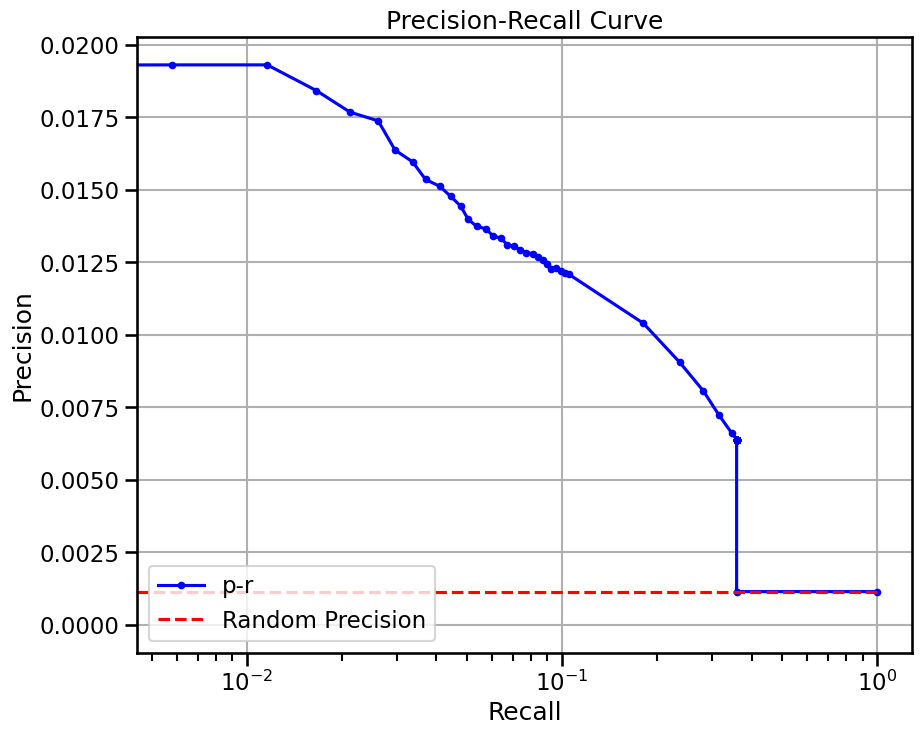

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads


Elapsed time: 66.80 seconds


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment


Top central genes: []


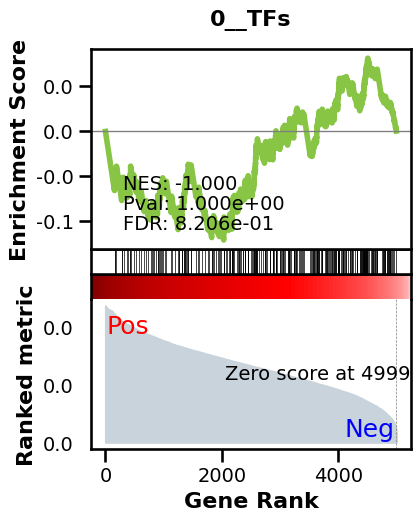

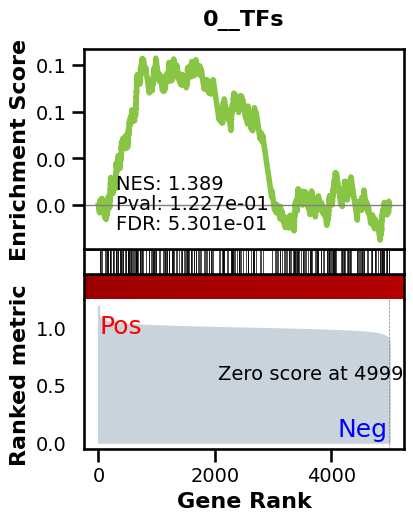

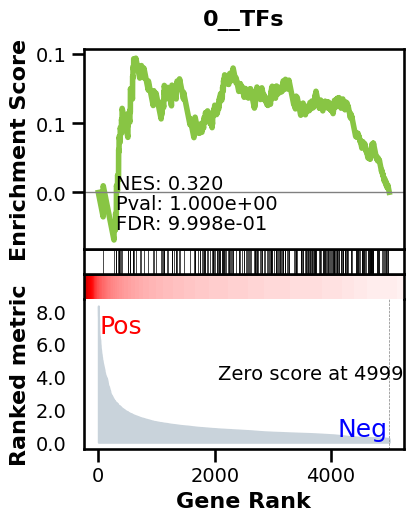

_________________________________________
TF specific enrichment


found some significant results for  5.882352941176471 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3467 genes
intersection pct: 0.6934
precision:  0.0013674763349924876 
recall:  0.3948610002177542 
random precision: 0.001146495246334619


  0%|          | 0/128 [00:00<?, ?it/s]

  4%|▍         | 5/128 [00:00<00:02, 49.86it/s]

  9%|▊         | 11/128 [00:00<00:02, 50.06it/s]

 13%|█▎        | 17/128 [00:00<00:02, 50.02it/s]

 18%|█▊        | 23/128 [00:00<00:02, 50.00it/s]

 22%|██▏       | 28/128 [00:00<00:02, 49.90it/s]

 26%|██▌       | 33/128 [00:00<00:01, 49.89it/s]

 30%|██▉       | 38/128 [00:00<00:01, 49.81it/s]

 34%|███▎      | 43/128 [00:00<00:01, 49.83it/s]

 38%|███▊      | 48/128 [00:00<00:01, 49.77it/s]

 41%|████▏     | 53/128 [00:01<00:01, 49.79it/s]

 45%|████▌     | 58/128 [00:01<00:01, 49.82it/s]

 49%|████▉     | 63/128 [00:01<00:01, 49.86it/s]

 53%|█████▎    | 68/128 [00:01<00:01, 49.81it/s]

 58%|█████▊    | 74/128 [00:01<00:01, 49.88it/s]

 62%|██████▏   | 79/128 [00:01<00:00, 49.90it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 49.91it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 49.83it/s]

 73%|███████▎  | 94/128 [00:01<00:00, 49.86it/s]

 77%|███████▋  | 99/128 [00:01<00:00, 49.87it/s]

 81%|████████▏ | 104/128 [00:02<00:00, 49.88it/s]

 85%|████████▌ | 109/128 [00:02<00:00, 49.85it/s]

 90%|████████▉ | 115/128 [00:02<00:00, 49.95it/s]

 95%|█████████▍| 121/128 [00:02<00:00, 49.99it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 49.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.88it/s]

Average Precision (AP):  0.0012721828999919962
Area Under Precision-Recall Curve (AUPRC):  0.0012424476276345787
EPR: 2.094470586424166


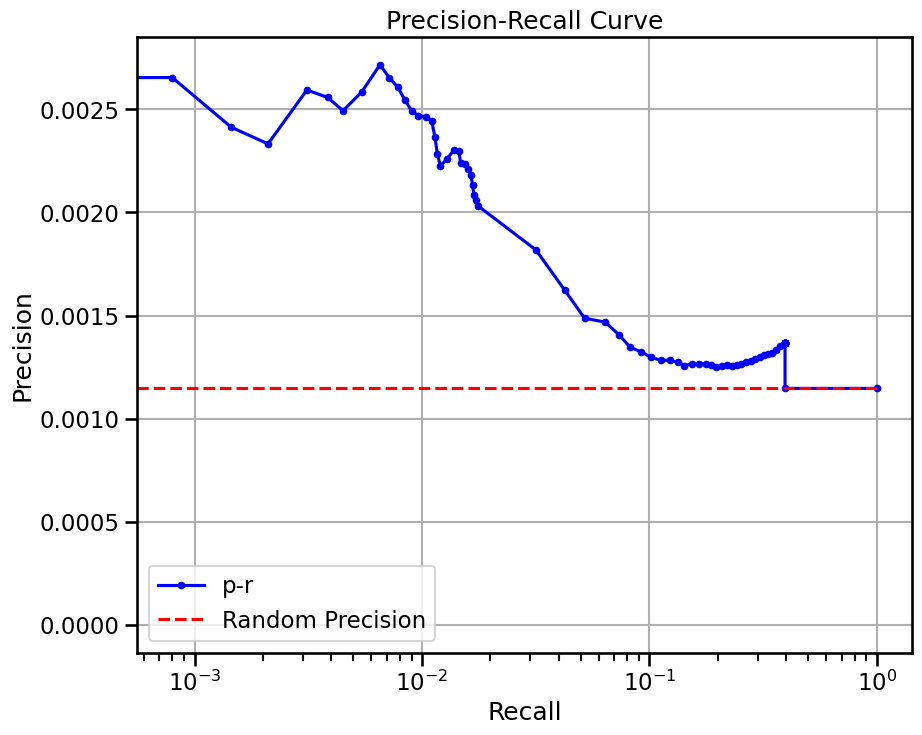

In [5]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
metrics = {}
shapes = []
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(to_use)]
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                        do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(genie_grn.shape[1])

In [6]:
metrics

{'genie3_tf_fibroblast': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Endometrium',
   'celltype.gmt__Microfold cells',
   'celltype.gmt__Stromal cells',
   'celltype.gmt__Mesangial cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Fibroblasts',
   'celltype.gmt__Alpha cells',
   'celltype.gmt__Satellite cells',
   'celltype.gmt__Pancreatic stellate cells',
   'celltype.gmt__Retinal progenitor cells',
   'celltype.gmt__Pancreatic progenitor cells',
   'celltype.gmt__Delta cells'],
  'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Mesangial cells'],
  'significant_enriched_TFtargets': 12.5,
  'precision': 0.008458778459255703,
  'recall': 0.5565176022835395,
  'rand_precision': 0.0012322201535409623,
  'auprc': 0.010025720493232191,
  'ap': 0.010870907382485789,
  'epr': 29.378975399877923},
 'genie3_fibroblast': {'enriched_terms_Central': ['celltype.gmt__Hepatic stellate c

In [7]:
shapes

[4289, 4997, 4781, 3117, 4105, 5000, 5000]

In [8]:
True
True
True
True
True
True
True
True
False
False
False
False
True
True

True

In [9]:
import pandas as pd

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,fibroblast,29.378975,0.010026,0.001232,12.500000,True,True
1,fibroblast,4.281148,0.001674,0.001232,29.166667,False,False
2,endothelial cell,11.426092,0.005505,0.001709,12.500000,True,True
3,endothelial cell,2.508257,0.001902,0.001709,14.062500,False,False
4,myofibroblast cell,5.627871,0.000910,0.000601,9.090909,True,True
5,myofibroblast cell,1.333105,0.000680,0.000601,0.000000,False,False
6,glial cell,7.720243,0.002188,0.000883,0.000000,True,True
7,glial cell,1.763139,0.001025,0.000883,0.000000,False,False
8,pericyte,13.581145,0.003723,0.001041,0.000000,True,True
9,pericyte,1.035993,0.001226,0.001041,0.000000,False,False
